In [1]:
# Generate Gaussian Process for total station data file

# Notebook used to compute the trajectories of prisms with Gaussian Process

In [1]:
import sys
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
import random
import os
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from IPython.display import HTML
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel)

import importlib
import scripts.theodolite_function as tfu
import scripts.theodolite_utils as tfuu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.gp_prediction_utils as GPf
GPf = importlib.reload(GPf)
import GPy
from wbml.plot import tweak
from stheno import B, Measure, GP, EQ, Delta
import torch

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
# Switch values if necessary 1 11 2021
#Dist_prism_12 = 1.0398341231585624*1000
#Dist_prism_13 = 0.818424700118086*1000
#Dist_prism_23 = 0.8806156053859284*1000
#Dist_GPS_12 = 0.835637436093363*1000
#Dist_GPS_13 = 0.7812173648662254*1000
#Dist_GPS_23 = 0.5166745729506486*1000

# 26 11 2021
#Dist_prism_12 = 1.03688797895733
#Dist_prism_13 = 0.822536135483593
#Dist_prism_23 = 0.8783765747673403
#Dist_GPS_12 = 0.7828618536473139
#Dist_GPS_13 = 0.8394208131018045
#Dist_GPS_23 = 0.5176447366930409

# 31 01 2022
#Dist_prism_12 = 1.038854051807371
#Dist_prism_13 = 0.8202157646292075
#Dist_prism_23 = 0.879788333022114
#Dist_GPS_12 = 0.7830826912858335
#Dist_GPS_13 = 0.8418404054627937
#Dist_GPS_23 = 0.5172558618541933
     
# 03 02 2022
#Dist_prism_12 = 1.0403741344089559
#Dist_prism_13 = 0.8239475424257701
#Dist_prism_23 = 0.8766711748547112
#Dist_GPS_12 = 0.781661929058067
#Dist_GPS_13 = 0.8353981332464246
#Dist_GPS_23 = 0.5174987476948135

# 17 02 2022 / 24 02 2022
#Dist_prism_12 = 0.8882613537922258
#Dist_prism_13 = 0.8262903370535766
#Dist_prism_23 = 1.0377436460567973
#Dist_GPS_12 = 0.7809786915630756
#Dist_GPS_13 = 0.8378323585433202
#Dist_GPS_23 = 0.5191788936274444  

# 07 03 2022
#Dist_prism_12 = 0.8832836583456264
#Dist_prism_13 = 0.8247449387008166
#Dist_prism_23 = 1.039409793600046
#Dist_GPS_12 = 0.7781099344563802
#Dist_GPS_13 = 0.8431026980109139
#Dist_GPS_23 = 0.5157221841320069

# 12 03 2022
#Dist_prism_12 = 0.8860734460339026
#Dist_prism_13 = 0.8303896290142598
#Dist_prism_23 = 1.0393117663247973
#Dist_GPS_12 = 0.7829424296161074
#Dist_GPS_13 = 0.8415176433032493
#Dist_GPS_23 = 0.5161917038941966

# 14 03 2022 / 16 03 2022
#Dist_prism_12 = 0.8873171656784946
#Dist_prism_13 = 0.8272212117473343
#Dist_prism_23 = 1.0379270641796363
#Dist_GPS_12 = 0.7829081036179948
#Dist_GPS_13 = 0.8424633975958637
#Dist_GPS_23 = 0.5165807364575292

# 31 03 2022
#Dist_prism_12 = 0.8864675130714769
#Dist_prism_13 = 0.8240907534046003
#Dist_prism_23 = 1.0386580905077105
#Dist_GPS_12 = 0.7840545151932103
#Dist_GPS_13 = 0.8371156718750876
#Dist_GPS_23 = 0.5167633057807889

# 27 04 2022
#Dist_prism_12 = 0.8856608085851714
#Dist_prism_13 = 0.8264452483880412
#Dist_prism_23 = 1.0384219210289538
#Dist_GPS_12 = 0.7809547832390561
#Dist_GPS_13 = 0.8259590286006459
#Dist_GPS_23 = 0.5191274645630007  

# 27 04 2022 soir
#Dist_prism_12 = 0.8868846942534616
#Dist_prism_13 = 0.829169129877633
#Dist_prism_23 = 1.0387571594276301
#Dist_GPS_12 = 0.7837749633840095
#Dist_GPS_13 = 0.8323125081688734
#Dist_GPS_23 = 0.5187055120945835

# 05 05 2022
#Dist_prism_12 = 0.3819811991689936
#Dist_prism_13 = 0.4426382054042266
#Dist_prism_23 = 0.2564685508415531

# 13 05 2022
#Dist_prism_12 = 0.8113569618671205
#Dist_prism_13 = 0.8695313906832193
#Dist_prism_23 = 1.0383292631343506
#Dist_GPS_12 = 0.7800801192552722
#Dist_GPS_13 = 0.8396027021467387
#Dist_GPS_23 = 0.5157656903777014

# 23 05 2022
Dist_prism_12 = 0.3851913749758221
Dist_prism_13 = 0.4433899497583272
Dist_prism_23 = 0.25861327466684897

 /home/norlab/Repo_git/code_publication_IROS2022_MaximeVaidis/scripts/theodolite_utils.py:517: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Number sub-trajectories: 152


<IPython.core.display.Javascript object>


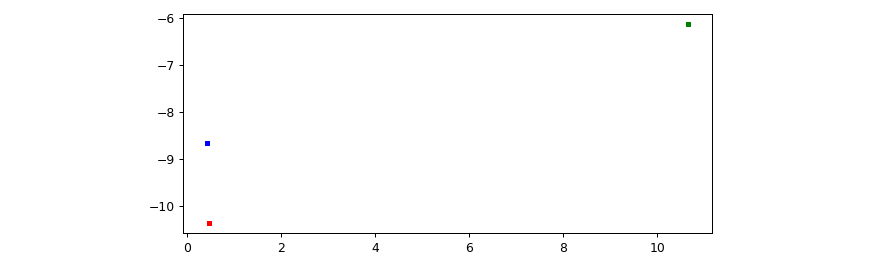

In [3]:
# Sort the data with the good intervals of time to process them

%matplotlib notebook
tfuu = importlib.reload(tfuu)
#path = "./data/total_station/20220523/"
path = "./data/raw_data/20220316/"

time_trimble_1, trimble_1 = tfuu.read_point_data_csv_file(path+"trimble1.csv")
time_trimble_2, trimble_2 = tfuu.read_point_data_csv_file(path+"trimble2.csv")
time_trimble_3, trimble_3 = tfuu.read_point_data_csv_file(path+"trimble3.csv")

# Work on the data with 3 prisms and 3 theodolites
tfu = importlib.reload(tfu)
# Slipt the data into different interval according to the timestamps of the measurements
limit_time_interval = 1    #3 seconds max
list_interval, list_time = tfu.split_time_interval_all_data(time_trimble_1, time_trimble_2, time_trimble_3, limit_time_interval)
# Keep only the intervals where the three theodlites have done some measurements at the same time
limit_search = 1
#print(list_interval[2])
list_trajectories_split = tfu.merge_interval(list_interval, list_time, time_trimble_1, time_trimble_2, time_trimble_3, limit_search)
print("Number sub-trajectories:",len(list_trajectories_split))
# Plot subtrajectory for debug
tfu.plot_subtrajectory_result(0, list_trajectories_split, trimble_1, trimble_2, trimble_3)

In [4]:
# Show first sub-trajectory

po=list_trajectories_split[0]
print(po)
print(len(trimble_1[1,po[0,0]:po[1,0]]),len(trimble_2[1,po[0,1]:po[1,1]]),len(trimble_3[1,po[0,2]:po[1,2]]))
print(min(time_trimble_1[po[0,0]],time_trimble_2[po[0,1]],time_trimble_3[po[0,2]]))
#print(max(time_trimble_1[po[1,0]],time_trimble_2[po[1,1]],time_trimble_3[po[1,2]]))

[[ 1  0  0]
 [41 40 40]]
40 40 40
1647471762.4704554


In [5]:
import scripts.theodolite_utils as tfuu
tfuu = importlib.reload(tfuu)
import warnings
import time
from tqdm import tqdm
warnings.filterwarnings('ignore')
tfu = importlib.reload(tfu)
GPf = importlib.reload(GPf)
#path_data = "./data/total_station/20220523/"
#path = "./data/prediction/"
path_data = "./data/raw_data/20220316/"
path = "./data/raw_data/20220316/"
B.epsilon = 1e-8
save = True
verbose=False
noise_GP = 0
variance_GP = 1
lengthscale_GP = 1

limit_points_windows = [18,18]
Mode_window = "ground-truth"

mode_arr = ["GP"]
size_interval_arr = [10]
number_restart_arr = [20]
trajectoire_arr = ["10-20"] #interval-restart
file_open = [path_data+"trimble"]
file_save = [path+"TS/1611-"+mode_arr[0]+"-"+trajectoire_arr[0]+"_"]
time_origin = 1647471762     ######### Important, need to change it, timestamp given by the function above

for m,n,p,r,s,nr in zip(mode_arr, size_interval_arr, trajectoire_arr, file_open, file_save, number_restart_arr):
    
    time_trimble_1, trimble_1 = tfuu.read_point_data_csv_file(r+"1"+".csv")
    time_trimble_2, trimble_2 = tfuu.read_point_data_csv_file(r+"2"+".csv")
    time_trimble_3, trimble_3 = tfuu.read_point_data_csv_file(r+"3"+".csv")
    
    time_trimble_1 = time_trimble_1 - np.ones_like(time_trimble_1)*time_origin
    time_trimble_2 = time_trimble_2 - np.ones_like(time_trimble_2)*time_origin
    time_trimble_3 = time_trimble_3 - np.ones_like(time_trimble_3)*time_origin
    
    limit_time_interval = 1
    list_interval, list_time = tfu.split_time_interval_all_data(time_trimble_1, time_trimble_2, time_trimble_3, limit_time_interval)
    limit_search = 1
    list_trajectories_split = tfu.merge_interval(list_interval, list_time, time_trimble_1, time_trimble_2, time_trimble_3, limit_search)
    
    start_time = time.time()
    Mode = m
    trajectoire = p
    size_interval = n
    
    Number_points_window = []
    Prediction_1_MGPO = []
    Prediction_2_MGPO = []
    Prediction_3_MGPO = []
    Prediction_1_GP = []
    Prediction_2_GP = []
    Prediction_3_GP = []
    T_prediction = []
    compteur = 0
    
    for i in tqdm(list_trajectories_split):
        
        index_1 = np.array([i[0,0],i[1,0]])
        index_2 = np.array([i[0,1],i[1,1]])
        index_3 = np.array([i[0,2],i[1,2]])

        begin = np.max([time_trimble_1[index_1[0]], time_trimble_2[index_2[0]], time_trimble_3[index_3[0]]])
        end = np.min([time_trimble_1[index_1[1]], time_trimble_2[index_2[1]], time_trimble_3[index_3[1]]])
        rate = 5  #Hz
        T_prediction_init = torch.from_numpy(np.arange(begin, end, 1/rate))

        if(abs(end-begin)>n):

            if(Mode == "MGPO" or Mode == "All"):
                T_MGPO, S_MGPO = GPf.data_training_MGPO(time_trimble_1, time_trimble_2, time_trimble_2, trimble_1, 
                                                                     trimble_2, trimble_3, index_1, index_2, index_3)
                print("Training")
                m = GPf.training_MGPO(nr, verbose, T_MGPO, S_MGPO)
                print("Prediction")
                for i in T_prediction_init.numpy():
                    T_prediction.append(i+time_origin)
                    P1_MGPO, P2_MGPO, P3_MGPO = GPf.unit_prediction_MGPO(i, m)
                    Prediction_1_MGPO.append(P1_MGPO)
                    Prediction_2_MGPO.append(P2_MGPO)
                    Prediction_3_MGPO.append(P3_MGPO)

            if(Mode == "GP" or Mode == "All"):
                T1, X1, Y1, Z1, T2, X2, Y2, Z2, T3, X3, Y3, Z3 = GPf.data_training_GP(time_trimble_1, time_trimble_2, time_trimble_3, trimble_1, 
                                                                     trimble_2, trimble_3, index_1, index_2, index_3)
                print("Training")
                mx1, my1, mz1, mx2, my2, mz2, mx3, my3, mz3 = GPf.training_GP(nr, verbose, T1, X1, Y1,
                                                                          Z1, T2, X2, Y2, Z2, T3, X3, Y3, Z3)
                print("Prediction")
                for i in T_prediction_init.numpy():
                    T_prediction.append(i+time_origin)
                    P1_GP, P2_GP, P3_GP = GPf.unit_prediction_GP(i, mx1, my1, mz1, mx2, my2, mz2, mx3, my3, mz3)
                    Prediction_1_GP.append(P1_GP)
                    Prediction_2_GP.append(P2_GP)
                    Prediction_3_GP.append(P3_GP)

    stop_time = time.time()
    print(stop_time - start_time)
    
print("Finished !")

  0%|          | 0/152 [00:00<?, ?it/s]

Training
Prediction


  1%|          | 1/152 [00:16<42:34, 16.91s/it]

Training
Prediction


  1%|▏         | 2/152 [00:31<39:28, 15.79s/it]

Training
Prediction


  3%|▎         | 5/152 [00:42<17:24,  7.11s/it]

Training


  5%|▌         | 8/152 [00:58<14:34,  6.07s/it]

Prediction
Training
Prediction


  7%|▋         | 11/152 [01:10<12:21,  5.26s/it]

Training
Prediction


  8%|▊         | 12/152 [01:23<15:23,  6.60s/it]

Training


  9%|▊         | 13/152 [01:36<17:50,  7.70s/it]

Prediction
Training
Prediction


 11%|█         | 17/152 [01:49<12:09,  5.40s/it]

Training
Prediction


 12%|█▏        | 18/152 [02:02<14:57,  6.70s/it]

Training
Prediction


 12%|█▎        | 19/152 [02:16<17:28,  7.89s/it]

Training


 13%|█▎        | 20/152 [02:29<19:37,  8.92s/it]

Prediction
Training


 14%|█▍        | 21/152 [02:41<21:12,  9.72s/it]

Prediction
Training
Prediction


 14%|█▍        | 22/152 [02:54<22:43, 10.49s/it]

Training
Prediction


 15%|█▌        | 23/152 [03:09<25:05, 11.67s/it]

Training


 16%|█▌        | 24/152 [03:23<26:23, 12.37s/it]

Prediction
Training
Prediction


 17%|█▋        | 26/152 [03:38<21:19, 10.16s/it]

Training
Prediction


 18%|█▊        | 27/152 [03:55<24:43, 11.87s/it]

Training
Prediction


 19%|█▉        | 29/152 [04:10<20:45, 10.13s/it]

Training
Prediction


 22%|██▏       | 34/152 [04:25<11:35,  5.90s/it]

Training
Prediction


 23%|██▎       | 35/152 [04:38<13:28,  6.91s/it]

Training


 25%|██▌       | 38/152 [04:52<11:35,  6.10s/it]

Prediction
Training
Prediction


 31%|███       | 47/152 [05:08<05:58,  3.41s/it]

Training
Prediction


 33%|███▎      | 50/152 [05:27<06:54,  4.06s/it]

Training
Prediction


 36%|███▌      | 54/152 [05:43<06:36,  4.05s/it]

Training
Prediction


 36%|███▌      | 55/152 [06:25<12:31,  7.75s/it]

Training


 38%|███▊      | 57/152 [06:41<12:16,  7.75s/it]

Prediction
Training


 39%|███▉      | 60/152 [06:55<10:29,  6.84s/it]

Prediction
Training
Prediction


 40%|████      | 61/152 [07:12<12:22,  8.16s/it]

Training
Prediction


 42%|████▏     | 64/152 [07:30<10:44,  7.33s/it]

Training
Prediction


 44%|████▍     | 67/152 [07:47<09:34,  6.76s/it]

Training
Prediction


 45%|████▌     | 69/152 [08:12<11:25,  8.26s/it]

Training
Prediction


 47%|████▋     | 71/152 [08:38<12:46,  9.46s/it]

Training


 47%|████▋     | 72/152 [08:56<14:15, 10.69s/it]

Prediction
Training
Prediction


 49%|████▉     | 75/152 [09:12<11:00,  8.57s/it]

Training
Prediction


 51%|█████▏    | 78/152 [09:31<09:40,  7.84s/it]

Training


 52%|█████▏    | 79/152 [09:46<10:47,  8.88s/it]

Prediction
Training
Prediction


 54%|█████▍    | 82/152 [10:04<09:04,  7.77s/it]

Training
Prediction


 55%|█████▍    | 83/152 [10:34<12:53, 11.20s/it]

Training
Prediction


 59%|█████▊    | 89/152 [10:54<07:02,  6.70s/it]

Training
Prediction


 61%|██████    | 92/152 [11:11<06:22,  6.37s/it]

Training
Prediction


 62%|██████▏   | 94/152 [11:32<07:01,  7.26s/it]

Training


 66%|██████▌   | 100/152 [11:48<04:24,  5.08s/it]

Prediction
Training
Prediction


 66%|██████▋   | 101/152 [12:05<05:18,  6.24s/it]

Training
Prediction


 67%|██████▋   | 102/152 [12:23<06:31,  7.82s/it]

Training


 68%|██████▊   | 103/152 [12:39<07:26,  9.12s/it]

Prediction
Training


 70%|██████▉   | 106/152 [12:54<05:44,  7.49s/it]

Prediction
Training
Prediction


 70%|███████   | 107/152 [13:12<06:52,  9.16s/it]

Training
Prediction


 73%|███████▎  | 111/152 [13:29<04:38,  6.80s/it]

Training
Prediction


 74%|███████▎  | 112/152 [13:46<05:31,  8.28s/it]

Training


 76%|███████▋  | 116/152 [14:04<03:53,  6.49s/it]

Prediction
Training


 79%|███████▉  | 120/152 [14:20<02:56,  5.53s/it]

Prediction
Training
Prediction


 80%|███████▉  | 121/152 [14:38<03:38,  7.04s/it]

Training
Prediction


 80%|████████  | 122/152 [14:58<04:32,  9.07s/it]

Training
Prediction


 82%|████████▏ | 125/152 [15:20<03:46,  8.38s/it]

Training
Prediction


 83%|████████▎ | 126/152 [16:18<07:00, 16.18s/it]

Training
Prediction


 86%|████████▌ | 130/152 [22:42<19:46, 53.92s/it]

Training
Prediction


 86%|████████▌ | 131/152 [23:07<17:23, 49.70s/it]

Training
Prediction


 87%|████████▋ | 132/152 [23:30<15:03, 45.15s/it]

Training
Prediction


 88%|████████▊ | 134/152 [23:55<10:18, 34.38s/it]

Training
Prediction


 89%|████████▉ | 135/152 [24:14<08:56, 31.55s/it]

Training
Prediction


 89%|████████▉ | 136/152 [24:31<07:33, 28.35s/it]

Training


 90%|█████████ | 137/152 [24:48<06:27, 25.86s/it]

Prediction
Training
Prediction


 92%|█████████▏| 140/152 [25:11<03:20, 16.69s/it]

Training
Prediction


 93%|█████████▎| 141/152 [25:40<03:30, 19.13s/it]

Training
Prediction


 93%|█████████▎| 142/152 [26:14<03:42, 22.25s/it]

Training
Prediction


 94%|█████████▍| 143/152 [26:33<03:13, 21.52s/it]

Training
Prediction


 95%|█████████▍| 144/152 [26:52<02:47, 20.91s/it]

Training
Prediction


 96%|█████████▌| 146/152 [27:20<01:48, 18.04s/it]

Training
Prediction


 98%|█████████▊| 149/152 [27:36<00:36, 12.01s/it]

Training
Prediction


100%|██████████| 152/152 [27:52<00:00, 11.01s/it]

1672.9138836860657
Finished !


In [6]:
# Save file of GP

save = True
#path = "./data/prediction/"
path = "./data/raw_data/"
if(Mode == "MGPO" or Mode == "All"):
    trajectoire = "MGPO-10-20"
    if save:
        tfu.Convert_data_prediction_to_csv(T_prediction, Prediction_1_MGPO, path+trajectoire+ "_1.csv")
        tfu.Convert_data_prediction_to_csv(T_prediction, Prediction_2_MGPO, path+trajectoire+ "_2.csv")
        tfu.Convert_data_prediction_to_csv(T_prediction, Prediction_3_MGPO, path+trajectoire+ "_3.csv")
if(Mode == "GP" or Mode == "All"):
    trajectoire = "GP-10-20"
    if save:
        tfu.Convert_data_prediction_to_csv(T_prediction, Prediction_1_GP, path+trajectoire+ "_1.csv")
        tfu.Convert_data_prediction_to_csv(T_prediction, Prediction_2_GP, path+trajectoire+ "_2.csv")
        tfu.Convert_data_prediction_to_csv(T_prediction, Prediction_3_GP, path+trajectoire+ "_3.csv")

Conversion done !
Conversion done !
Conversion done !


Mean e:  1178.569436873512 21026.01681894524 20207.421331315527
Variance e:  561.5166085328656 9664.106823854541 9830.333306977756


<IPython.core.display.Javascript object>


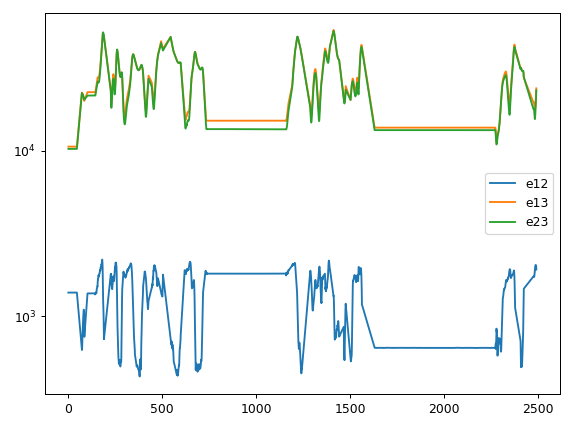

In [14]:
# Show inter-prism error obtained

%matplotlib notebook
GPf = importlib.reload(GPf)
error_euclidian_GP, T_prediction = GPf.error_calculation_eucli(Prediction_1_GP, Prediction_2_GP, Prediction_3_GP, Dist_prism_12, Dist_prism_13, Dist_prism_23)
error_e_GP = np.array(error_euclidian_GP)
print("Mean e: ", np.mean(error_e_GP[:,0]),np.mean(error_e_GP[:,1]),np.mean(error_e_GP[:,2]))
print("Variance e: ", np.std(error_e_GP[:,0]),np.std(error_e_GP[:,1]),np.std(error_e_GP[:,2]))
plt.figure(0)
plt.plot(T_prediction, error_e_GP[:,0], label="e12")
plt.plot(T_prediction, error_e_GP[:,1], label="e13")
plt.plot(T_prediction, error_e_GP[:,2], label="e23")
ax = plt.gca()
ax.set_yscale('symlog')
plt.legend(loc='best')
#ax.set_ylim([0, 1])
plt.show()